In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from src.utils.functions import read_json_file
from src.utils.graphs import saveModelMetrics
from typing import Tuple, List, Any

In [2]:
pecan_path = 'etc/results/Pecanstreet/single-step/661'
hue_path = 'etc/results/HUE/single-step/1'
pecan_dict = {
    'all': {
        '1hour': None,
        '15min': None,
        '1min': None
    },
    'PCA': {
        '1hour': None,
        '15min': None,
        '1min': None
    },
    'SHAP':{
        '1hour': None,
        '15min': None,
        '1min': None
    }
}
hue_dict = {
    'all': {
        '1hour': None
    },
    'PCA': {
        '1hour': None
    },
    'SHAP':{
        '1hour': None
    }
}

In [3]:
for types in pecan_dict.keys():
    for resolution in pecan_dict[types].keys():
        pecan_dict[types][resolution] = pd.read_json(f'{pecan_path}/{resolution}/{types}/metrics_report.json')
        print(f'{pecan_path}/{resolution}/{types}/metrics_report.json-')
        print("Models Loaded", pecan_dict[types][resolution]['model'].to_list(), len(pecan_dict[types][resolution]['model'].to_list()))
    print("********Pecan metrics loaded********")
    for resolution in hue_dict[types].keys():
        hue_dict[types][resolution] = pd.read_json(f'{hue_path}/{resolution}/{types}/metrics_report.json')
        print(f'{hue_path}/{resolution}/{types}/metrics_report.json')
        print("Models Loaded", hue_dict[types][resolution]['model'].to_list(), len(hue_dict[types][resolution]['model'].to_list()))
    print("********HUE metrics loaded********")


etc/results/Pecanstreet/single-step/661/1hour/all/metrics_report.json-
Models Loaded ['RNN', 'LSTM', 'GRU', 'Transformer', 'TST', 'FCN', 'MLP', 'ConvRNN', 'ResNet', 'TCN', 'SVR', 'XGBoost', 'SARIMAX'] 13
etc/results/Pecanstreet/single-step/661/15min/all/metrics_report.json-
Models Loaded ['RNN', 'GRU', 'Transformer', 'LSTM', 'FCN', 'TST', 'MLP', 'ResNet', 'ConvRNN', 'TCN', 'SVR', 'XGBoost', 'SARIMAX'] 13
etc/results/Pecanstreet/single-step/661/1min/all/metrics_report.json-
Models Loaded ['RNN', 'Transformer', 'TST', 'GRU', 'ConvRNN', 'LSTM', 'FCN', 'MLP', 'ResNet', 'TCN', 'SVR', 'XGBoost', 'SARIMAX'] 13
********Pecan metrics loaded********
etc/results/HUE/single-step/1/1hour/all/metrics_report.json
Models Loaded ['RNN', 'LSTM', 'GRU', 'MLP', 'FCN', 'Transformer', 'ConvRNN', 'ResNet', 'TCN', 'TST', 'SVR', 'XGBoost', 'SARIMAX'] 13
********HUE metrics loaded********
etc/results/Pecanstreet/single-step/661/1hour/PCA/metrics_report.json-
Models Loaded ['RNN', 'GRU', 'LSTM', 'ConvRNN', 'MLP'

In [4]:
pecan_dict

{'all': {'1hour':     test|MAE  test|MAPE  test|MSE        model
  0   0.161391   4.885468  0.065241          RNN
  1   0.193785   4.330738  0.083158         LSTM
  2   0.132360   4.355187  0.067314          GRU
  3   0.237091   3.562838  0.094368  Transformer
  4   0.143682   4.565838  0.052046          TST
  5   0.769495  11.020015  0.943165          FCN
  6   0.204914   5.385582  0.084806          MLP
  7   0.175652   5.133239  0.072686      ConvRNN
  8   0.974766   4.328185  1.530514       ResNet
  9   0.208067   4.566456  0.098427          TCN
  10  0.175471   0.795650  0.034032          SVR
  11  0.023855   0.402943  0.001334      XGBoost
  12  0.109684   3.398128  0.037332      SARIMAX,
  '15min':     test|MAE  test|MAPE  test|MSE        model
  0   0.059679   0.921834  0.010658          RNN
  1   0.067281   0.918399  0.012321          GRU
  2   0.204017   1.589740  0.071302  Transformer
  3   0.057011   1.000414  0.010605         LSTM
  4   0.519894   3.234518  0.414474        

In [5]:
resolution_local_path = f'etc/imgs/Pecanstreet/single-step/661/1hour'
resolution_local_path = f'etc/imgs/Pecanstreet/single-step/661'

In [6]:
def printDataMetrics(data_dict, dataset, _id):
    for types in data_dict.keys():
        for resolution in data_dict[types].keys():
            models_labels = data_dict[types][resolution]['model'].to_list()
            models_labels.sort()
            models_data = np.log(data_dict[types][resolution]['test|MSE'].to_list())
            saveModelMetrics(categories=models_labels,
                            data=[(models_data, r'$log$ MSE Error', '-', '#A52A2A')],
                            title=f'[`{dataset}`] - Eval error for {types} features - {resolution}',
                            path=f'etc/imgs/{dataset}/single-step/{_id}/{resolution}/{types}',
                            filename=f'eval_radar_plot_{resolution}_{types}')
            plt.show()
    

[(array([-2.72966053, -2.48701061, -2.69838584, -2.3605484 , -2.95563362,
       -0.05851359, -2.46738807, -2.62160902,  0.42560394, -2.31843818,
       -3.38045756, -6.61938992, -3.28789593]), '$log$ MSE Error', '-', '#A52A2A')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


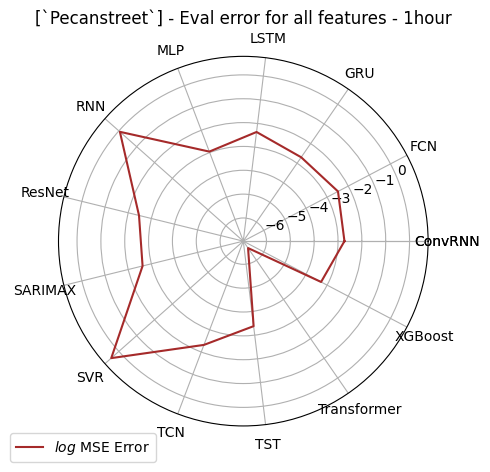

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.54140127, -4.39642672, -2.6408344 , -4.54643198, -0.88074472,
       -4.06711805, -3.71636551,  0.84048115, -3.85178167, -2.87761673,
        1.12559878, -3.51264577, -4.54697429]), '$log$ MSE Error', '-', '#A52A2A')]


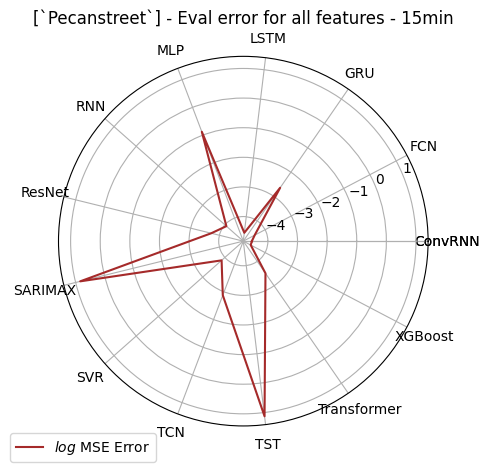

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-5.76321741, -3.33925588, -5.03520386, -4.13266171, -4.92781836,
       -4.40516578,  2.29249407, -4.75225223,  1.1298993 , -5.37007573,
        2.00536423, -4.00437636, -5.6899849 ]), '$log$ MSE Error', '-', '#A52A2A')]


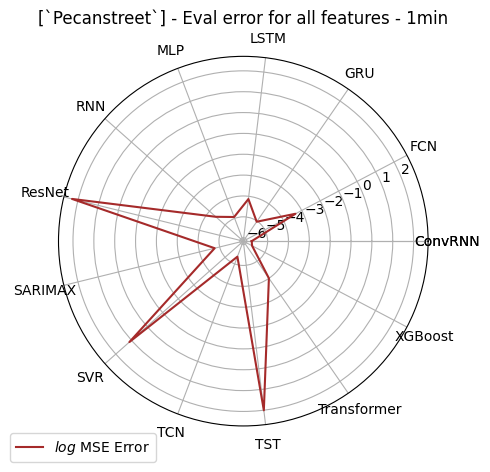

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-2.91962052, -2.89759907, -2.75511317, -2.71139004, -2.5762861 ,
        2.79796238, -3.50499879, -8.2903006 , -3.09833157, -1.55697791,
        1.5442517 , -2.30895471, -3.28393649]), '$log$ MSE Error', '-', '#A52A2A')]


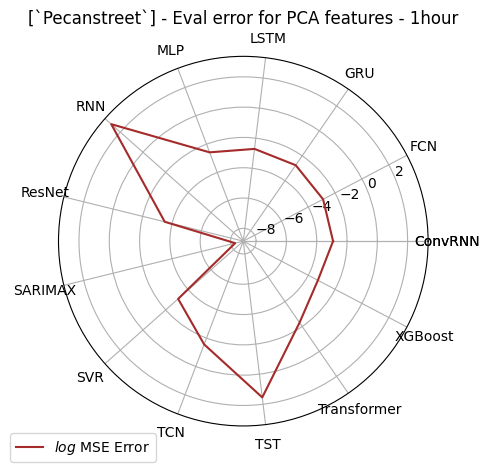

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.57961946, -4.39378861, -4.57957934, -3.90396583, -4.10075065,
       -0.11464769, -2.35464689, -2.78240752, -4.17494623, -4.53480872,
       -9.84275812, -4.54696977, -1.27311235]), '$log$ MSE Error', '-', '#A52A2A')]


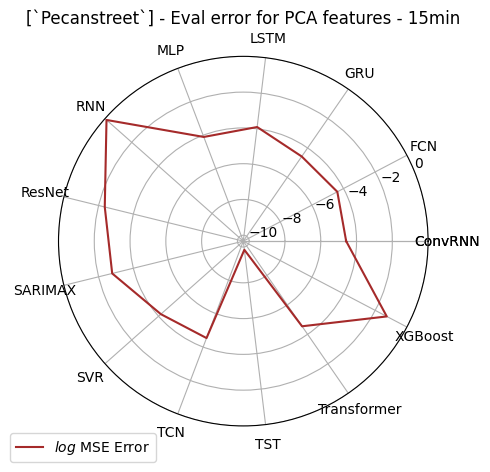

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-5.33196222, -5.16491899, -5.12407279, -4.84668172, -3.32835561,
        2.33502126, -5.35102809, -4.31703278,  1.06252422, -5.295837  ,
        1.37627537, -3.7847442 , -5.69020819]), '$log$ MSE Error', '-', '#A52A2A')]


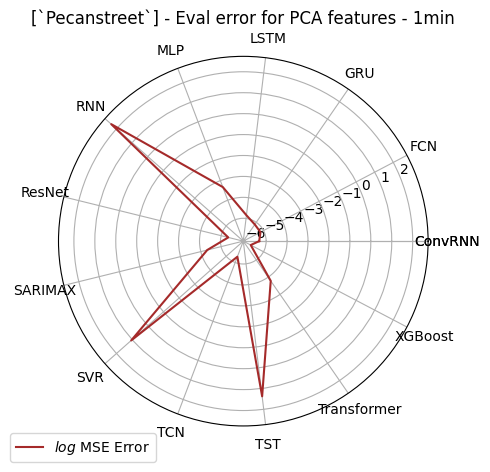

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-2.9912003 , -2.21838864, -2.83228428, -2.77252566, -2.22250661,
       -1.55959149, -1.95905455, -2.48279875, -0.01190756, -2.34525031]), '$log$ MSE Error', '-', '#A52A2A')]


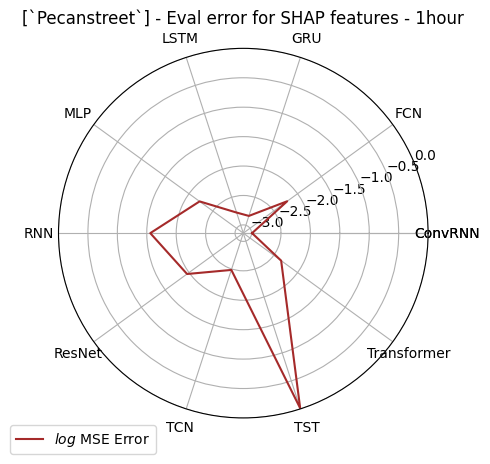

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.52748088, -0.36773422, -2.6876199 , -4.29914241, -4.27725899,
       -4.04853694, -4.09118595, -3.53534855,  0.07863391, -2.85587754]), '$log$ MSE Error', '-', '#A52A2A')]


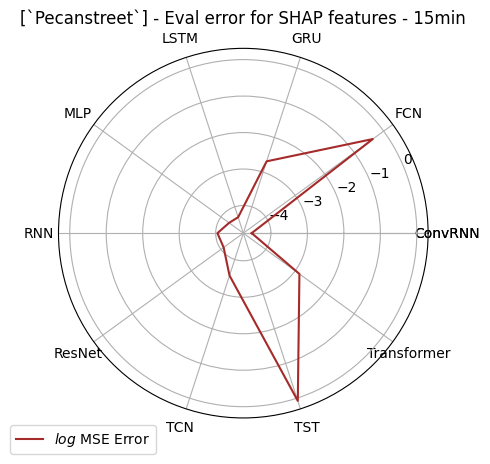

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-5.37829984, -5.82327641, -5.28785157, -3.31442384, -4.89684469,
       -5.75903329,  0.37376826, -4.36268263,  0.75701006, -4.31774587]), '$log$ MSE Error', '-', '#A52A2A')]


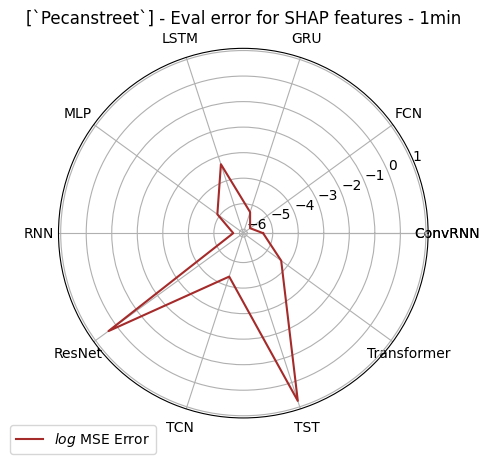

In [7]:
printDataMetrics(pecan_dict, 'Pecanstreet', '661')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.77116762, -4.74813902, -4.77380857, -4.78720965, -2.52347108,
       -3.84490158, -4.8855696 , -2.45021675, -4.45076864, -4.82995113,
       -5.2017519 , -5.58012191, -1.58273408]), '$log$ MSE Error', '-', '#A52A2A')]


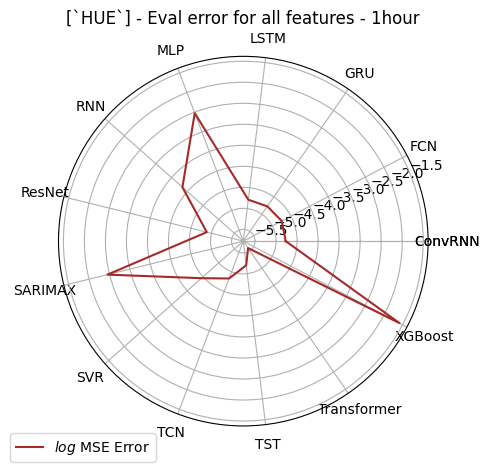

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-0.74915816, -1.06926324, -4.90962344, -4.73370622, -0.72468511,
       -4.27831334, -4.89507988, -4.41626347, -4.85796737, -4.7660457 ,
       -0.25106798, -4.57834913, -1.58273408]), '$log$ MSE Error', '-', '#A52A2A')]


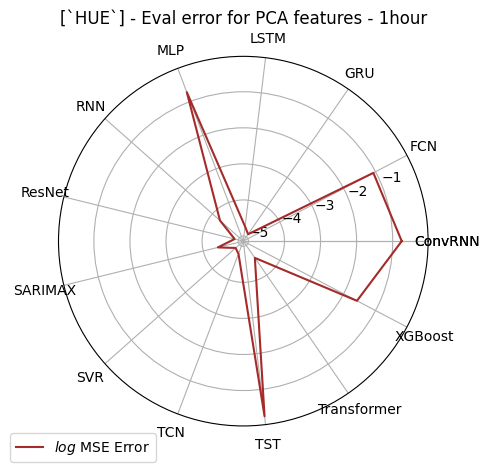

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.8249518 , -3.76841232, -4.87926132, -4.73745831, -4.64100465,
       -4.65388824, -1.87080868, -1.28326833, -4.36100528, -4.1093133 ]), '$log$ MSE Error', '-', '#A52A2A')]


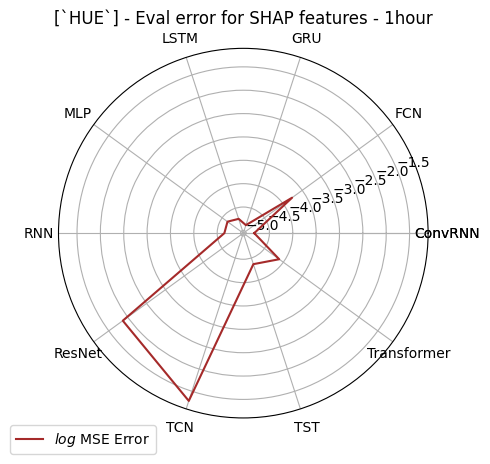

In [8]:
printDataMetrics(hue_dict, 'HUE', '1')

In [9]:
def printResolutionMetricComparison(datadict, dataset, _id):
    color_dict = {
    '1hour': '#FF5733',
    '15min': '#33FF57',
    '1min': '#5733FF'
    }
    for types in datadict.keys():
        values = []
        models_labels = None
        for resolution in datadict[types].keys():
            models_labels = datadict[types][resolution]['model'].to_list()
            models_labels.sort()
            models_data = datadict[types][resolution]['test|MSE'].to_list()
            values.append((np.log(models_data), resolution, '-', color_dict[resolution]))
        saveModelMetrics(categories=models_labels,
                    data=values,
                    title=f'[`{dataset}`] - Comparison of eval error for {types} features',
                    path=f'etc/imgs/{dataset}/single-step/{_id}/resolution_comparison',
                    filename=f'eval_radar_plot_by_features_{types}')
        plt.show()

        

[(array([-2.72966053, -2.48701061, -2.69838584, -2.3605484 , -2.95563362,
       -0.05851359, -2.46738807, -2.62160902,  0.42560394, -2.31843818,
       -3.38045756, -6.61938992, -3.28789593]), '1hour', '-', '#FF5733'), (array([-4.54140127, -4.39642672, -2.6408344 , -4.54643198, -0.88074472,
       -4.06711805, -3.71636551,  0.84048115, -3.85178167, -2.87761673,
        1.12559878, -3.51264577, -4.54697429]), '15min', '-', '#33FF57'), (array([-5.76321741, -3.33925588, -5.03520386, -4.13266171, -4.92781836,
       -4.40516578,  2.29249407, -4.75225223,  1.1298993 , -5.37007573,
        2.00536423, -4.00437636, -5.6899849 ]), '1min', '-', '#5733FF')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


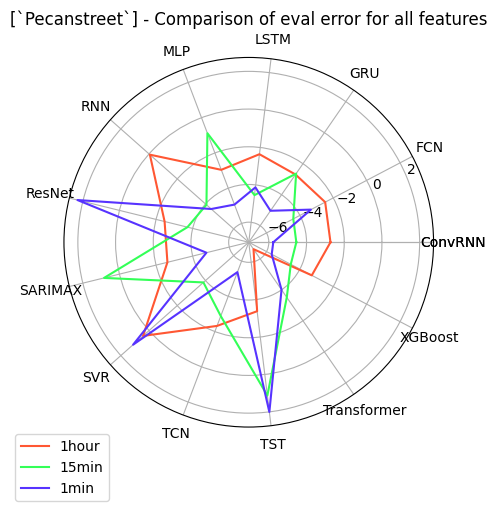

[(array([-2.91962052, -2.89759907, -2.75511317, -2.71139004, -2.5762861 ,
        2.79796238, -3.50499879, -8.2903006 , -3.09833157, -1.55697791,
        1.5442517 , -2.30895471, -3.28393649]), '1hour', '-', '#FF5733'), (array([-4.57961946, -4.39378861, -4.57957934, -3.90396583, -4.10075065,
       -0.11464769, -2.35464689, -2.78240752, -4.17494623, -4.53480872,
       -9.84275812, -4.54696977, -1.27311235]), '15min', '-', '#33FF57'), (array([-5.33196222, -5.16491899, -5.12407279, -4.84668172, -3.32835561,
        2.33502126, -5.35102809, -4.31703278,  1.06252422, -5.295837  ,
        1.37627537, -3.7847442 , -5.69020819]), '1min', '-', '#5733FF')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


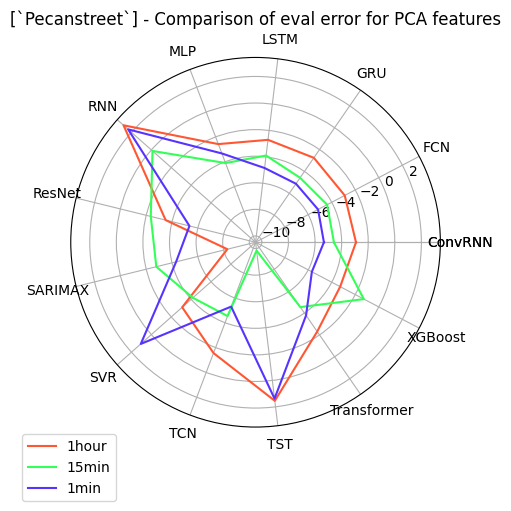

[(array([-2.9912003 , -2.21838864, -2.83228428, -2.77252566, -2.22250661,
       -1.55959149, -1.95905455, -2.48279875, -0.01190756, -2.34525031]), '1hour', '-', '#FF5733'), (array([-4.52748088, -0.36773422, -2.6876199 , -4.29914241, -4.27725899,
       -4.04853694, -4.09118595, -3.53534855,  0.07863391, -2.85587754]), '15min', '-', '#33FF57'), (array([-5.37829984, -5.82327641, -5.28785157, -3.31442384, -4.89684469,
       -5.75903329,  0.37376826, -4.36268263,  0.75701006, -4.31774587]), '1min', '-', '#5733FF')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


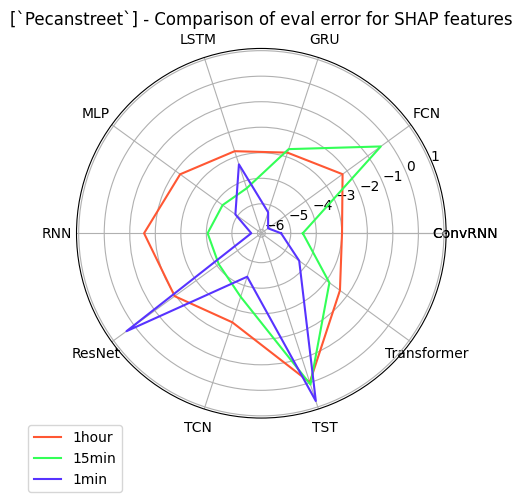

In [10]:
printResolutionMetricComparison(pecan_dict, 'Pecanstreet', '661')

In [11]:
types_color_dict = {
    'all': '#FF5733',
    'PCA': '#33FF57',
    'SHAP': '#5733FF'

}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-4.77116762, -4.74813902, -4.77380857, -4.78720965, -2.52347108,
       -3.84490158, -4.8855696 , -2.45021675, -4.45076864, -4.82995113,
       -5.2017519 , -5.58012191, -1.58273408]), 'all', '-', '#FF5733'), (array([-0.74915816, -1.06926324, -4.90962344, -4.73370622, -0.72468511,
       -4.27831334, -4.89507988, -4.41626347, -4.85796737, -4.7660457 ,
       -0.25106798, -4.57834913, -1.58273408]), 'PCA', '-', '#33FF57')]


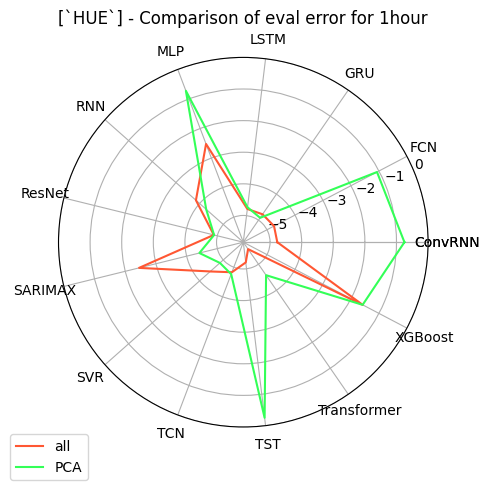

In [12]:
values = []
models_labels = None
for types in hue_dict.keys():
    if types != 'SHAP':
        models_labels = hue_dict[types]['1hour']['model'].to_list()

        models_labels.sort()
        models_data = hue_dict[types]['1hour']['test|MSE'].to_list()
        values.append((np.log(models_data), types, '-', types_color_dict[types]))

saveModelMetrics(categories=models_labels,
            data=values,
            title=f'[`HUE`] - Comparison of eval error for 1hour',
            path=f'etc/imgs/HUE/single-step/1/1hour',
            filename=f'eval_radar_plot_1hour_by_types')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-2.72966053, -2.48701061, -2.69838584, -2.3605484 , -2.95563362,
       -0.05851359, -2.46738807, -2.62160902,  0.42560394, -2.31843818,
       -3.38045756, -6.61938992, -3.28789593]), 'all', '-', '#FF5733'), (array([-2.91962052, -2.89759907, -2.75511317, -2.71139004, -2.5762861 ,
        2.79796238, -3.50499879, -8.2903006 , -3.09833157, -1.55697791,
        1.5442517 , -2.30895471, -3.28393649]), 'PCA', '-', '#33FF57')]


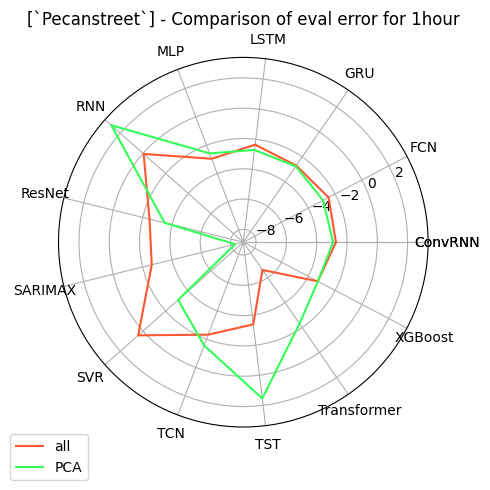

[(array([-4.54140127, -4.39642672, -2.6408344 , -4.54643198, -0.88074472,
       -4.06711805, -3.71636551,  0.84048115, -3.85178167, -2.87761673,
        1.12559878, -3.51264577, -4.54697429]), 'all', '-', '#FF5733'), (array([-4.57961946, -4.39378861, -4.57957934, -3.90396583, -4.10075065,
       -0.11464769, -2.35464689, -2.78240752, -4.17494623, -4.53480872,
       -9.84275812, -4.54696977, -1.27311235]), 'PCA', '-', '#33FF57')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


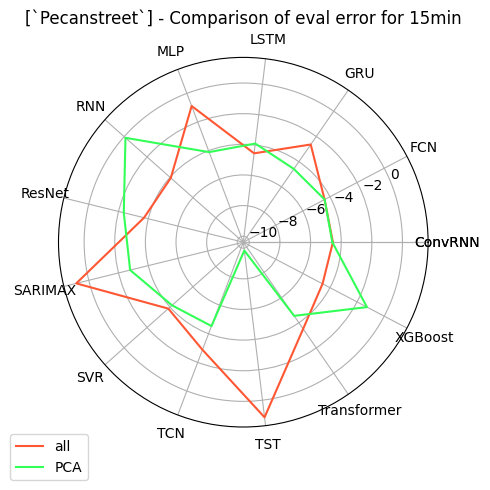

[(array([-5.76321741, -3.33925588, -5.03520386, -4.13266171, -4.92781836,
       -4.40516578,  2.29249407, -4.75225223,  1.1298993 , -5.37007573,
        2.00536423, -4.00437636, -5.6899849 ]), 'all', '-', '#FF5733'), (array([-5.33196222, -5.16491899, -5.12407279, -4.84668172, -3.32835561,
        2.33502126, -5.35102809, -4.31703278,  1.06252422, -5.295837  ,
        1.37627537, -3.7847442 , -5.69020819]), 'PCA', '-', '#33FF57')]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


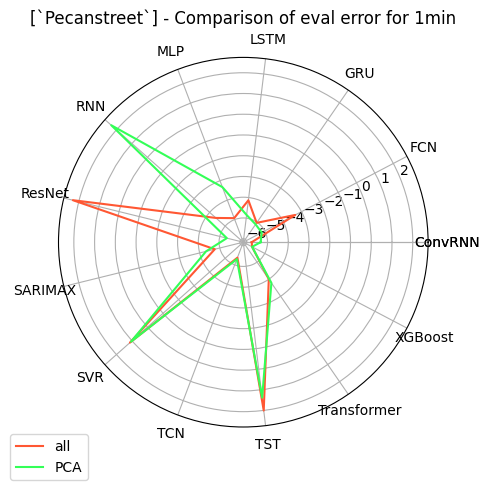

In [13]:
hour_values = []
fift_values = []
min_values =[]
models_labels = None
for types in pecan_dict.keys():
    if types != 'SHAP':
        models_labels = pecan_dict[types]['1hour']['model'].to_list()
        models_labels.sort()
        hour_data = pecan_dict[types]['1hour']['test|MSE'].to_list()
        hour_values.append((np.log(hour_data), types, '-', types_color_dict[types]))
        fift_data = pecan_dict[types]['15min']['test|MSE'].to_list()
        fift_values.append((np.log(fift_data), types, '-', types_color_dict[types]))
        min_data = pecan_dict[types]['1min']['test|MSE'].to_list()
        min_values.append((np.log(min_data), types, '-', types_color_dict[types]))
        

saveModelMetrics(categories=models_labels,
            data=hour_values,
            title=f'[`Pecanstreet`] - Comparison of eval error for 1hour',
            path=f'etc/imgs/Pecanstreet/single-step/661/1hour/PCA-Study',
            filename=f'eval_radar_plot_1hour')
plt.show()
saveModelMetrics(categories=models_labels,
            data=fift_values,
            title=f'[`Pecanstreet`] - Comparison of eval error for 15min',
            path=f'etc/imgs/Pecanstreet/single-step/661/15min/PCA-Study',
            filename=f'eval_radar_plot_15min')
plt.show()
saveModelMetrics(categories=models_labels,
            data=min_values,
            title=f'[`Pecanstreet`] - Comparison of eval error for 1min',
            path=f'etc/imgs/Pecanstreet/single-step/661/1min/PCA-Study',
            filename=f'eval_radar_plot_1min')

plt.show()

    

In [27]:
pecan_dict['SHAP']['1hour'].sort_values(by='model', ignore_index=True)

,test|MAE,test|MAPE,test|MSE,model
0,0.283120,6.056004,0.140992,ConvRNN
1,0.381782,6.957380,0.210222,FCN
2,0.125716,4.205902,0.058878,GRU
3,0.258069,3.744099,0.108784,LSTM
4,0.197234,5.360751,0.083509,MLP
5,0.132064,4.112994,0.050227,RNN
6,0.793256,3.739769,0.988163,ResNet
7,0.180533,4.883007,0.095823,TCN
8,0.187380,4.257485,0.062504,TST
9,0.231976,5.122391,0.108337,Transformer


In [26]:
hue_dict['SHAP']['1hour'].sort_values(by='model', ignore_index=True)

,test|MAE,test|MAPE,test|MSE,model
0,0.085489,0.122487,0.012766,ConvRNN
1,0.352494,0.430556,0.153999,FCN
2,0.056793,0.087844,0.007603,GRU
3,0.059821,0.093594,0.008761,LSTM
4,0.059618,0.094597,0.009524,MLP
5,0.055525,0.087803,0.008027,RNN
6,0.414322,0.530380,0.277130,ResNet
7,0.094407,0.140560,0.016419,TCN
8,0.064235,0.099649,0.009648,TST
9,0.140334,0.179236,0.023089,Transformer


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-2.62160902, -0.05851359, -2.69838584, -2.48701061, -2.46738807,
       -2.72966053,  0.42560394, -3.28789593, -3.38045756, -2.31843818,
       -2.95563362, -2.3605484 , -6.61938992]), 'Pecanstreet', '-', '#FF5733'), (array([-4.8855696 , -2.52347108, -4.77380857, -4.74813902, -4.78720965,
       -4.77116762, -2.45021675, -1.58273408, -5.2017519 , -4.45076864,
       -4.82995113, -3.84490158, -5.58012191]), 'HUE', '-', '#33FF57')]


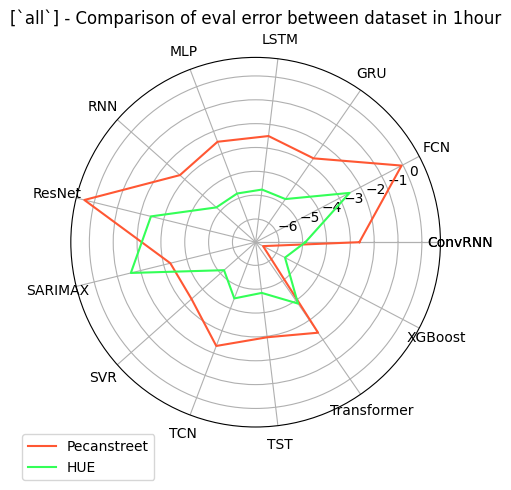

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-2.71139004,  1.5442517 , -2.89759907, -2.75511317, -2.5762861 ,
       -2.91962052,  2.79796238, -3.28393649, -3.50499879, -2.30895471,
       -3.09833157, -1.55697791, -8.2903006 ]), 'Pecanstreet', '-', '#FF5733'), (array([-4.85796737, -0.72468511, -4.89507988, -4.73370622, -4.7660457 ,
       -4.90962344, -0.25106798, -1.58273408, -0.74915816, -4.57834913,
       -4.41626347, -4.27831334, -1.06926324]), 'HUE', '-', '#33FF57')]


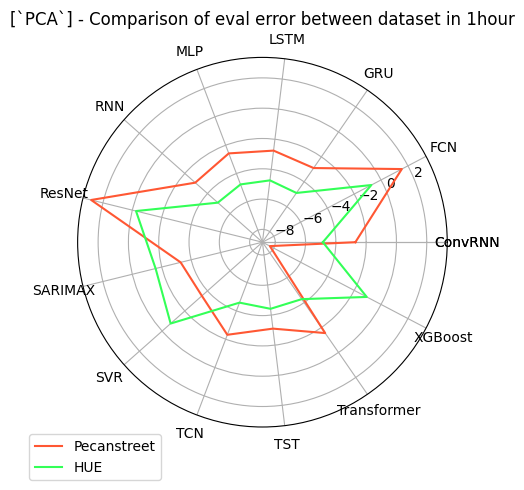

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[(array([-1.95905455, -1.55959149, -2.83228428, -2.21838864, -2.48279875,
       -2.9912003 , -0.01190756, -2.34525031, -2.77252566, -2.22250661]), 'Pecanstreet', '-', '#FF5733'), (array([-4.36100528, -1.87080868, -4.87926132, -4.73745831, -4.65388824,
       -4.8249518 , -1.28326833, -4.1093133 , -4.64100465, -3.76841232]), 'HUE', '-', '#33FF57')]


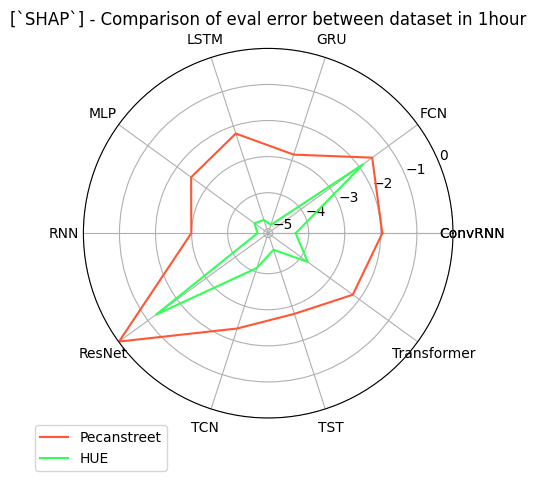

In [28]:
for types in pecan_dict.keys():
    pecan_df = pecan_dict[types]['1hour'].sort_values(by='model', ignore_index=True)
    hue_df = hue_dict[types]['1hour'].sort_values(by='model', ignore_index=True)
    labels = pecan_df['model'].to_list()
    pecan_data = pecan_df['test|MSE'].values
    hue_data = hue_df['test|MSE'].values

    saveModelMetrics(categories=labels,
            data=[(np.log(pecan_data), 'Pecanstreet', '-', '#FF5733'), (np.log(hue_data), 'HUE', '-', '#33FF57')],
            title=f'[`{types}`] - Comparison of eval error between dataset in 1hour',
            path=f'etc/imgs/dataset_comparison',
            filename=f'{types}_eval_radar_plot_1hour')
    plt.show()

    
    